In [1]:
library(tidyverse)
library(repr)
library(infer)
library(broom)
library(GGally)
library(modelr)
library(leaps)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘modelr’


The following object is masked from ‘package:broom’:

    bootstrap




# (1) Data Description (from Individual Assignment #1)
> This dataset is made up of data extracted from the 1994 American Census database (extraction done by Barry Becker). Each row describes an individual who completed the census in 1994, totaling 32,561 observation. It was downloaded from the UC Irvine Machine Learning repository. There are 15 variables:

Descriptions of the variables are as follows: 

> Age: age of individual (numerical)
> 
> workclass: represents employment of the of the individual (categorical variables with 9 types)
>
> fnlwgt: a continous variable that estimates the amount of people the entry represents
>
> education: ordinal categorical variable describing highest education level (16 types)
>
> education-num: numerical variable describing hghest education level 
>
> marital-status: marital status of individual (categorical, 7 types)
>
> occupation: the kind of occupation of the individual (categorical, 15 types)
>
> relationship: the relationship of the individual relative to others (categorical, 6 types)
>
> race: the race of the individual (categorical, 5 types)
>
> sex: Binary variable representing the sex of the individual (assuming sex has a binary)
>
> capital-gain: the amount of capital gains acheived by the individual (continuous)
>
> capital-loss: the amount of capital losses acheived by the individual (continuous)
>
> hours-per-week: the amount of working hours per week of the individual (continuous)
>
> native-country: the country of origin of the individual (categorical, 42 countries)
>
> income: if the individual had an income over 50k or below 50k (binary categorical)
> 

# (2) Question

> Our income variable can be used to predict whether an individual will have an income above or below 50k. I would like to invesitgate whether race, sex and native country can be used for this prediction regardless of class and education. By doing this, I would be examining the effects of demographic factors on the economic status of an individual.
>
> My question is as follows: "Can demographic factors such as sex, race, and native country be used to accurately predict whether an individual’s income exceeds $50,000?"
>
> Using logistic regression, we can look at the predictive nature of each variable and compare the effects. 

# (3) Exploratory Data Analysis and Visualization

In [2]:
census <- read.table("data/adult.data", sep = ',')

In [3]:
head(census)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#applying column names 
names(census)[1] <- "age"
names(census)[2] <- "workclass"
names(census)[3] <- "fnlwgt"
names(census)[4] <- "education"
names(census)[5] <- "education-num"
names(census)[6] <- "marital-status"
names(census)[7] <- "occupation"
names(census)[8] <- "relationship"
names(census)[9] <- "race"
names(census)[10] <- "sex"
names(census)[11] <- "capital-gain"
names(census)[12] <- "capital-loss"
names(census)[13] <- "hours-per-week"
names(census)[14] <- "native_country"
names(census)[15] <- "income"

In [5]:
head(census, 3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


An important thing to visualize is the distribution of values within each variable. We will use a bar plot.

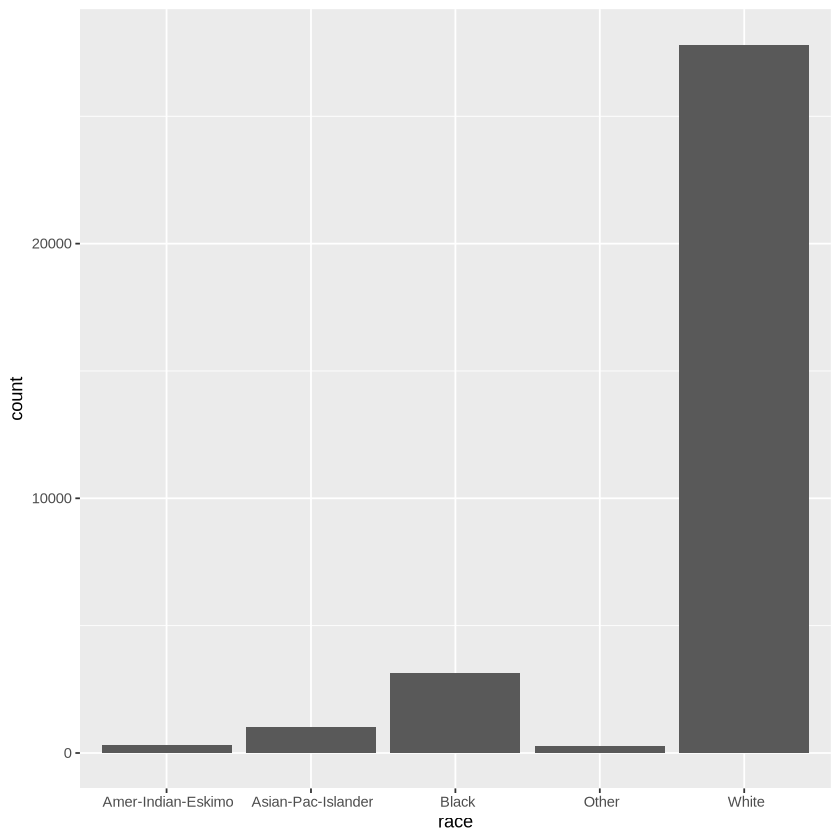

In [6]:
#select relevant columns
census_small <- census %>%
    select('race','sex','native_country','income')

#create bar plots for each
race_plot <- ggplot(data = census_small, aes(x = race),stat="count") +
  geom_bar()
sex_plot <- ggplot(data = census_small, aes(x = sex)) +
  geom_bar()

country_plot <- ggplot(data = census_small, aes(x = native_country))+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    geom_bar()

race_plot

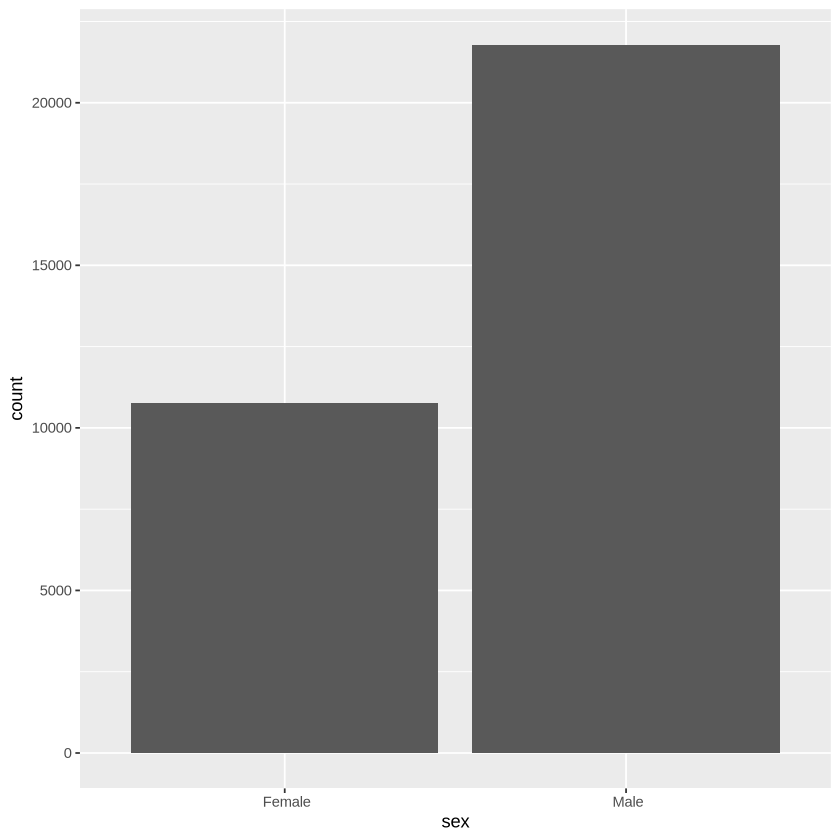

In [7]:
sex_plot

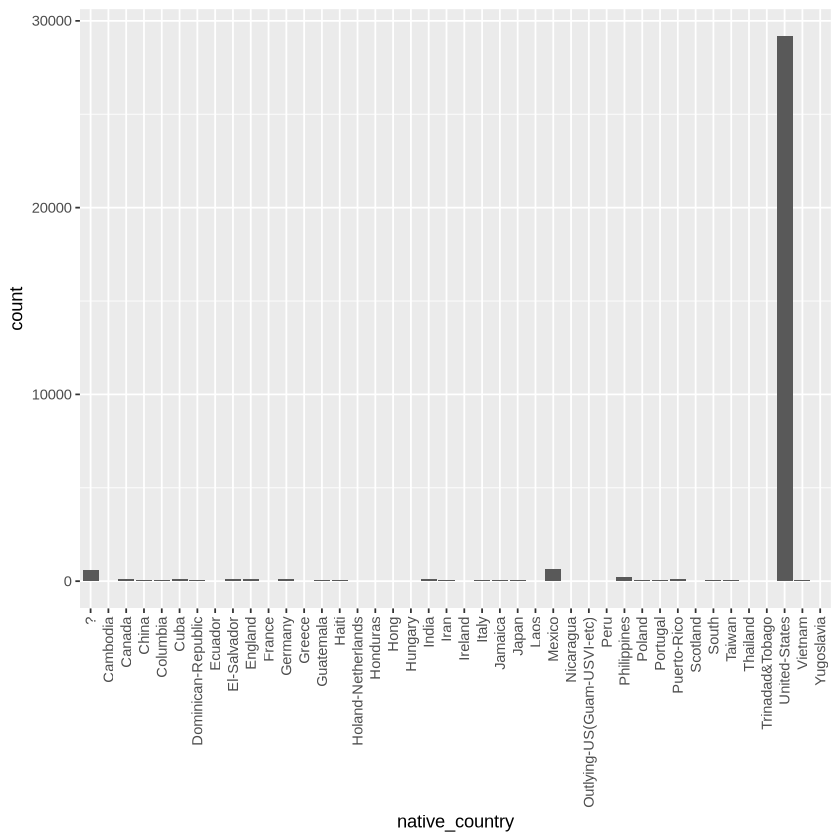

In [8]:
country_plot

From these plots, we can see that the class distribution in these variables is not equal. For the race variable, it is primarily white. There is also many more men than women in this dataset. Finally, there is an overwhelming majority of observations with the U.S.A as their native country (which is expected since this is american census data). Because of how disporportional these classes are, our logistic regression may not be able to accurately predict income for those in minority classes. The model won't be able to train on enough examples in order to learn their patterns. 

In [9]:
#look at summary for data types
summary(census)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education-num   marital-status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [10]:
#look for missing values
colSums(is.na(census))

age      workclass         fnlwgt      education  education-num 
             0              0              0              0              0 
marital-status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital-gain   capital-loss hours-per-week native_country         income 
             0              0              0              0              0

While there are no nan values, we can see from the native_country plot above that missing values are replaced with '?'. Those can observations be removed later on.

In [11]:
#Counting missing values replaced with ' ?' in the dataset
question_mark_counts <- sapply(census, function(column) sum(column == " ?"))

question_mark_counts

age      workclass         fnlwgt      education  education-num 
             0           1836              0              0              0 
marital-status     occupation   relationship           race            sex 
             0           1843              0              0              0 
  capital-gain   capital-loss hours-per-week native_country         income 
             0              0              0            583              0

There are 583 missing values from our native country column. Because it is such a small proportion, we can easily remove these observations before evaluating.

# Part 2
## (1) Methods and Plan

From Part 1 in the assignment, we decided to use logistic regression for our predictive model. Because our response variable is binary, logistic regression can be used for predictive modelling, where the response is a probability. We will relax the question we asked in Part 1 to allow for forward selection modelling. This will allow us to make the best predictive model, and it can also answer whether the demographic features are included as good predictors. Logistic Regression is a common choice for binary prediction, and the results are easy to interpret. However, one limitation is that the model can only evaluate linear relationships in the data. If some/all of our variables do not share linear relationships with the response, we will not be able to detect any relationship. 

Forward prediction modelling will allow us to decide on the best predictors of our response that can potentially improve the accuracy of our model. Additionally, it simplifies our model, reducing the complexity and improving interpretability. We haven't gone over a method of forward selection for logistic regression, so this will be discussed with my group before our final assignment. I will create a baseline in this assignment, and evaluate the model. 

From the first part of the assignment, we found that missing values were replaced with '?' values. There are only 3 variables with missing values. For the sake of simplicity in this assignment, we will remove these variables entirely. 

Afterwards, we will split the data into a training and test set. If we don’t separate the dataset, we risk overfitting the model. Additionally, it would leave us with no data for model evaluation. 



In [12]:
#take random sample of data to allow for faster processing

census_sample = census[sample(nrow(census), size=1000), ]

# split the data into training/test set

#convert columns to factors for modelling

# numeric_cols <- sapply(census_sample, is.numeric)
# census_sample[numeric_cols] <- lapply(census_sample[numeric_cols], as.factor)

census_sample <-
    census_sample %>%
    select(-workclass,-occupation, -native_country) %>%
    mutate(id = row_number())

training_census <- 
    census_sample %>%
    slice_sample(prop = 0.7, replace = FALSE)

testing_census <- 
    census_sample %>% 
    anti_join(training_census, by = "id") %>%
    select(-id)

training_census <- 
    training_census %>% 
    select(-id)


In [13]:
default_binary_log_census <- 
  glm(formula = as.factor(income) ~ .,
      data = training_census,
      family = binomial)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


# Issues
I'm having a lot of trouble with my model. I was struggling with the memory on Jupyter, and it kept crashing when doing the model. I tried reducing the sample size to fix it and was able to actually complete the model, but it's a very small sample.

In [14]:
tidy(default_binary_log_census, exponentiate=TRUE)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.096245e-03,2.392500e+00,-2.848846660,4.387802e-03
age,1.028548e+00,1.131857e-02,2.486892523,1.288643e-02
fnlwgt,1.000001e+00,1.548492e-06,0.867427167,3.857080e-01
education 11th,9.009691e-08,1.786580e+03,-0.009080131,9.927552e-01
education 12th,6.233264e-08,5.187342e+03,-0.003198320,9.974481e-01
education 1st-4th,6.477032e-08,5.442674e+03,-0.003041229,9.975735e-01
education 5th-6th,8.503907e-08,3.461783e+03,-0.004702824,9.962477e-01
education 7th-8th,2.218151e-08,2.047856e+03,-0.008606076,9.931334e-01
education 9th,5.501762e-08,2.394166e+03,-0.006981809,9.944294e-01


In our final report, we will need to determine a method of model selection to streamline our process. It would appear that capital_gain has the smallest p_value, but there are several categories with larger p_values that will probably be removed in the selection. It is unclear why there is no data for 'education_num', because it is a numeric variable with no missing values. We will also need to evaluate the performance of the model on the test set after modelling.